In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_blobs(n_samples=2000, n_features=2, cluster_std = 3, centers = 2, random_state=42)
n_features=2
print(X.shape,y.shape)

(2000, 2) (2000,)


In [3]:
def visualise(X,y):
    plt.scatter(X[:,0],X[:,1],c=y,cmap="viridis")
    plt.show()

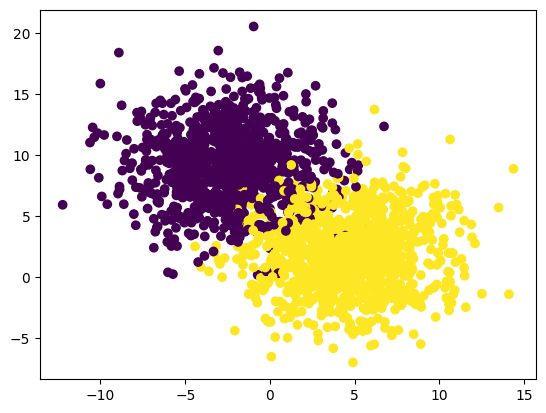

In [4]:
visualise(X,y)

In [5]:
def normalize(X):
    u = X.mean()
    s = X.std()
    
    return (X - u)/s

In [6]:
X=normalize(X)

In [7]:
XT,Xt,yT,yt = train_test_split(X,y,test_size = 0.25,shuffle = False,random_state=0)

In [8]:
print(XT.shape, yT.shape)
print(Xt.shape, yt.shape)

(1500, 2) (1500,)
(500, 2) (500,)


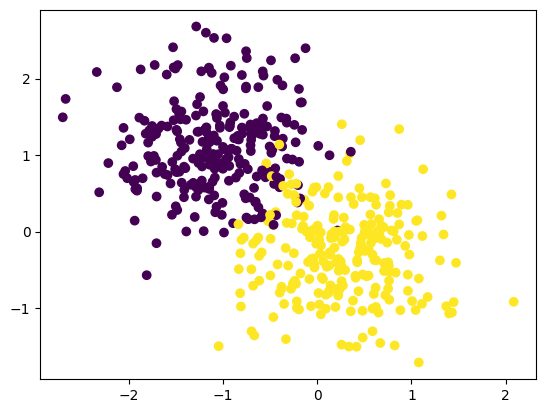

In [9]:
visualise(Xt,yt)

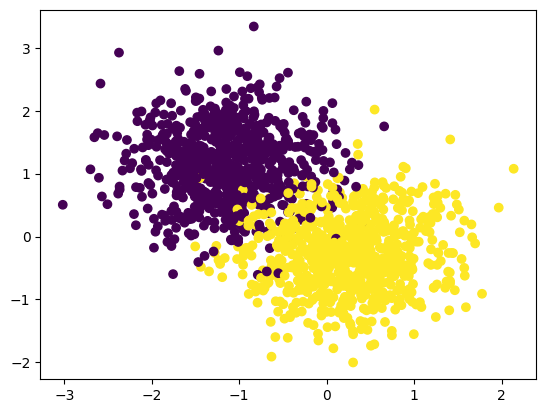

In [10]:
visualise(XT,yT)

In [11]:
def preprocess(X):
    if X.shape[1] == n_features:
        ones = np.ones((X.shape[0],1))
        X = np.hstack((ones,X))

    return X 

In [12]:
XT = preprocess(X)

In [13]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

def error(y, yp):
    loss = -np.mean(y * np.log(yp) + (1 - y) * np.log(1 - yp))
    return loss


def gradient(X, y, yp):
    m = X.shape[0]
    grad = -(1/m) * np.dot(X.T, (y - yp))
    return grad


In [14]:
def train(X, y, maxIter=100, learning_rate=0.1):
    theta = np.random.randn(n_features + 1, 1)
    error_list = []
    for i in range(maxIter):
        yp = hypothesis(X, theta)
        e = error(y, yp)
        error_list.append(e)
        grad = gradient(X, y, yp)
        theta = theta - learning_rate * grad
    plt.plot(error_list)
    return theta

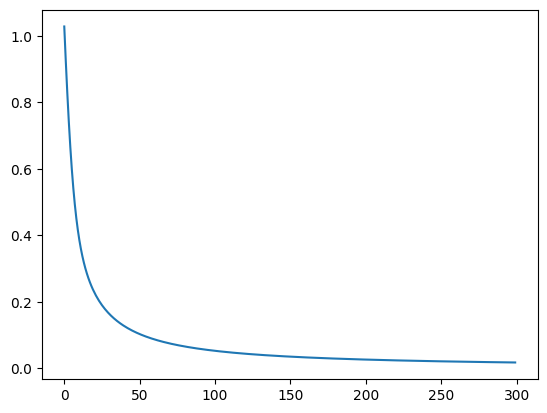

In [18]:
theta = train(XT,yT,maxIter=300,learning_rate=0.2,)

In [19]:
theta.shape

(3, 1500)

In [20]:
XT.shape

(2000, 3)